# **Laboratorio 12: 🚀 Despliegue 🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

Este laboratorio no fue entregado ni completado debido a la carga académica de los integrantes. Se espera realizar la entrega del laboratorio opcional 13.

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristian Oyarzo M.
- Nombre de alumno 2: Sebastián Quenti A.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/sebaquenti/Repositorio-MDS7202)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [1]:
import os
import pickle
import optuna
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

2024/11/27 13:07:27 INFO mlflow.tracking.fluent: Experiment with name 'XGBoost_Optimization_Experiment' does not exist. Creating a new experiment.
[I 2024-11-27 13:07:27,598] A new study created in memory with name: no-name-5ee36bb9-7e4b-445f-9075-6707175f3364


[I 2024-11-27 13:07:31,349] Trial 0 finished with value: 0.38190954773869346 and parameters: {'learning_rate': 0.08676970827835452, 'max_depth': 3, 'n_estimators': 184, 'min_child_weight': 1.6146184146481348, 'subsample': 0.8913189894745766, 'colsample_bytree': 0.5445822361676312, 'gamma': 2.077793645587436e-05}. Best is trial 0 with value: 0.38190954773869346.


[I 2024-11-27 13:07:34,193] Trial 1 finished with value: 0.4751131221719457 and parameters: {'learning_rate': 0.15911098933831166, 'max_depth': 5, 'n_estimators': 122, 'min_child_weight': 0.21187207231814736, 'subsample': 0.7459870369181949, 'colsample_bytree': 0.9625212748702814, 'gamma': 0.0008906901803975884}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:37,014] Trial 2 finished with value: 0.46220302375809935 and parameters: {'learning_rate': 0.25954916164164515, 'max_depth': 4, 'n_estimators': 193, 'min_child_weight': 0.3548144179708244, 'subsample': 0.8086793218833315, 'colsample_bytree': 0.7456654259125632, 'gamma': 1.3980032201120462e-06}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:39,750] Trial 3 finished with value: 0.34375 and parameters: {'learning_rate': 0.06300072218619392, 'max_depth': 4, 'n_estimators': 121, 'min_child_weight': 1.4084488543537799, 'subsample': 0.752063574974436, 'colsample_bytree': 0.5368292816765954, 'gamma': 0.0008407911141382184}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:43,015] Trial 4 finished with value: 0.43902439024390244 and parameters: {'learning_rate': 0.08123374677311285, 'max_depth': 10, 'n_estimators': 192, 'min_child_weight': 0.8224009836182896, 'subsample': 0.7779387490424967, 'colsample_bytree': 0.6360886650078741, 'gamma': 0.0014993250155981976}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:45,831] Trial 5 finished with value: 0.23376623376623376 and parameters: {'learning_rate': 0.01133006505840229, 'max_depth': 7, 'n_estimators': 84, 'min_child_weight': 9.570822277437626, 'subsample': 0.9351535729473033, 'colsample_bytree': 0.7144118883544093, 'gamma': 3.1616069113026807e-07}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:48,696] Trial 6 finished with value: 0.4636363636363636 and parameters: {'learning_rate': 0.1438509354870452, 'max_depth': 7, 'n_estimators': 192, 'min_child_weight': 2.7238870198382954, 'subsample': 0.9950142930353088, 'colsample_bytree': 0.693439275536367, 'gamma': 3.617302018976548e-08}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:51,642] Trial 7 finished with value: 0.30538922155688625 and parameters: {'learning_rate': 0.024175427257066794, 'max_depth': 10, 'n_estimators': 75, 'min_child_weight': 2.637191092236234, 'subsample': 0.8683393887508054, 'colsample_bytree': 0.5940948609995125, 'gamma': 4.389402109130436e-06}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:54,407] Trial 8 finished with value: 0.44768856447688565 and parameters: {'learning_rate': 0.1396753880693797, 'max_depth': 5, 'n_estimators': 66, 'min_child_weight': 0.21100471863246748, 'subsample': 0.726685021282288, 'colsample_bytree': 0.6745286297687183, 'gamma': 0.8063830848472724}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:07:57,796] Trial 9 finished with value: 0.4074074074074074 and parameters: {'learning_rate': 0.012175777157159085, 'max_depth': 9, 'n_estimators': 200, 'min_child_weight': 2.4075642680250984, 'subsample': 0.7851357640092471, 'colsample_bytree': 0.8312236778733122, 'gamma': 6.269438951164046e-06}. Best is trial 1 with value: 0.4751131221719457.


[I 2024-11-27 13:08:01,893] Trial 10 finished with value: 0.48214285714285715 and parameters: {'learning_rate': 0.2963978039115793, 'max_depth': 6, 'n_estimators': 143, 'min_child_weight': 0.10229061243937129, 'subsample': 0.5920720778724404, 'colsample_bytree': 0.9981423820600436, 'gamma': 0.12518546976846226}. Best is trial 10 with value: 0.48214285714285715.


[I 2024-11-27 13:08:05,517] Trial 11 finished with value: 0.48337028824833705 and parameters: {'learning_rate': 0.2793558102384594, 'max_depth': 6, 'n_estimators': 143, 'min_child_weight': 0.10122548309578595, 'subsample': 0.5857737308775878, 'colsample_bytree': 0.9975503706350272, 'gamma': 0.3512197217722722}. Best is trial 11 with value: 0.48337028824833705.


[I 2024-11-27 13:08:09,186] Trial 12 finished with value: 0.4582441113490364 and parameters: {'learning_rate': 0.29371115553743565, 'max_depth': 6, 'n_estimators': 154, 'min_child_weight': 0.10455350342483247, 'subsample': 0.5685147605212026, 'colsample_bytree': 0.9986107266286697, 'gamma': 0.8943408920641358}. Best is trial 11 with value: 0.48337028824833705.


[I 2024-11-27 13:08:13,233] Trial 13 finished with value: 0.44221105527638194 and parameters: {'learning_rate': 0.03672793407371513, 'max_depth': 8, 'n_estimators': 148, 'min_child_weight': 0.1282100972799185, 'subsample': 0.5283834275924195, 'colsample_bytree': 0.8945137693209441, 'gamma': 0.03780571564055254}. Best is trial 11 with value: 0.48337028824833705.


[I 2024-11-27 13:08:16,765] Trial 14 finished with value: 0.4766146993318486 and parameters: {'learning_rate': 0.1970791563122653, 'max_depth': 6, 'n_estimators': 151, 'min_child_weight': 0.5221393460702021, 'subsample': 0.6291423417538475, 'colsample_bytree': 0.8411737660387841, 'gamma': 0.038554710401049894}. Best is trial 11 with value: 0.48337028824833705.


[I 2024-11-27 13:08:20,581] Trial 15 finished with value: 0.477751756440281 and parameters: {'learning_rate': 0.11054855606418931, 'max_depth': 8, 'n_estimators': 99, 'min_child_weight': 0.20983119367138242, 'subsample': 0.646110766854877, 'colsample_bytree': 0.9204091911428042, 'gamma': 0.042840164008101825}. Best is trial 11 with value: 0.48337028824833705.


[I 2024-11-27 13:08:23,965] Trial 16 finished with value: 0.49209932279909707 and parameters: {'learning_rate': 0.22123019387508047, 'max_depth': 5, 'n_estimators': 137, 'min_child_weight': 0.10113556501497904, 'subsample': 0.6451991746612833, 'colsample_bytree': 0.8296510366293459, 'gamma': 0.009054106754521469}. Best is trial 16 with value: 0.49209932279909707.


[I 2024-11-27 13:08:27,643] Trial 17 finished with value: 0.4482758620689655 and parameters: {'learning_rate': 0.04497985832749598, 'max_depth': 5, 'n_estimators': 169, 'min_child_weight': 0.4535330788318576, 'subsample': 0.6784546107423128, 'colsample_bytree': 0.788070520324525, 'gamma': 0.005040444225553255}. Best is trial 16 with value: 0.49209932279909707.


[I 2024-11-27 13:08:30,745] Trial 18 finished with value: 0.47058823529411764 and parameters: {'learning_rate': 0.1856073176899047, 'max_depth': 3, 'n_estimators': 103, 'min_child_weight': 6.9693912529874575, 'subsample': 0.5080117165293199, 'colsample_bytree': 0.8759129733172155, 'gamma': 9.236525899403348e-05}. Best is trial 16 with value: 0.49209932279909707.


[I 2024-11-27 13:08:34,179] Trial 19 finished with value: 0.37119113573407203 and parameters: {'learning_rate': 0.027028699935900402, 'max_depth': 4, 'n_estimators': 132, 'min_child_weight': 0.2994806866040875, 'subsample': 0.6810431820332534, 'colsample_bytree': 0.7962959264545673, 'gamma': 0.005869679618056638}. Best is trial 16 with value: 0.49209932279909707.


[I 2024-11-27 13:08:38,465] Trial 20 finished with value: 0.4978165938864629 and parameters: {'learning_rate': 0.21640214153774145, 'max_depth': 8, 'n_estimators': 168, 'min_child_weight': 0.1601164822464388, 'subsample': 0.5893914071175785, 'colsample_bytree': 0.9535008623538285, 'gamma': 0.2147707923420354}. Best is trial 20 with value: 0.4978165938864629.


[I 2024-11-27 13:08:42,362] Trial 21 finished with value: 0.49137931034482757 and parameters: {'learning_rate': 0.21489243984502485, 'max_depth': 8, 'n_estimators': 173, 'min_child_weight': 0.15509775916735943, 'subsample': 0.5760321377333415, 'colsample_bytree': 0.9336417073097336, 'gamma': 0.16402106052417806}. Best is trial 20 with value: 0.4978165938864629.


[I 2024-11-27 13:08:46,193] Trial 22 finished with value: 0.512249443207127 and parameters: {'learning_rate': 0.21838240880443818, 'max_depth': 8, 'n_estimators': 170, 'min_child_weight': 0.16389864111340272, 'subsample': 0.5475393115008547, 'colsample_bytree': 0.9374110347838315, 'gamma': 0.007274706144920086}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:08:50,109] Trial 23 finished with value: 0.48291571753986334 and parameters: {'learning_rate': 0.11310946991686095, 'max_depth': 9, 'n_estimators': 167, 'min_child_weight': 0.17237472947760474, 'subsample': 0.6387292689829728, 'colsample_bytree': 0.862729931192626, 'gamma': 0.008805224886484105}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:08:53,960] Trial 24 finished with value: 0.49443207126948774 and parameters: {'learning_rate': 0.11051159321317562, 'max_depth': 9, 'n_estimators': 164, 'min_child_weight': 0.6323826577021837, 'subsample': 0.541215172154288, 'colsample_bytree': 0.9468298087949193, 'gamma': 0.000231617748765875}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:08:57,893] Trial 25 finished with value: 0.4930875576036866 and parameters: {'learning_rate': 0.10932638696574185, 'max_depth': 9, 'n_estimators': 160, 'min_child_weight': 0.3066999264451766, 'subsample': 0.5032947161984092, 'colsample_bytree': 0.9395194129059585, 'gamma': 0.00014970827976674186}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:01,827] Trial 26 finished with value: 0.4583333333333333 and parameters: {'learning_rate': 0.06660634046063664, 'max_depth': 8, 'n_estimators': 179, 'min_child_weight': 0.7189578829243407, 'subsample': 0.5453257904550124, 'colsample_bytree': 0.9007791097785324, 'gamma': 0.0002284207030724687}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:05,153] Trial 27 finished with value: 0.48598130841121495 and parameters: {'learning_rate': 0.17280231189320786, 'max_depth': 9, 'n_estimators': 51, 'min_child_weight': 0.5278968011319528, 'subsample': 0.6057609077316664, 'colsample_bytree': 0.9666521078078633, 'gamma': 4.6947520146648866e-05}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:08,747] Trial 28 finished with value: 0.46741573033707867 and parameters: {'learning_rate': 0.12733254967141186, 'max_depth': 7, 'n_estimators': 179, 'min_child_weight': 1.3050038982457932, 'subsample': 0.5394980920746313, 'colsample_bytree': 0.946823477598534, 'gamma': 0.0003526665759438647}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:12,917] Trial 29 finished with value: 0.4790697674418605 and parameters: {'learning_rate': 0.08887143267220775, 'max_depth': 10, 'n_estimators': 161, 'min_child_weight': 0.27841094273932726, 'subsample': 0.5482250809023577, 'colsample_bytree': 0.9073193926230849, 'gamma': 0.0023421739785508397}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:16,379] Trial 30 finished with value: 0.48878923766816146 and parameters: {'learning_rate': 0.09048267174648257, 'max_depth': 8, 'n_estimators': 179, 'min_child_weight': 4.167905720097578, 'subsample': 0.7056772596198919, 'colsample_bytree': 0.8021091794410697, 'gamma': 2.0324122155872966e-05}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:20,349] Trial 31 finished with value: 0.4918032786885246 and parameters: {'learning_rate': 0.09915374602705457, 'max_depth': 9, 'n_estimators': 159, 'min_child_weight': 0.36990567150294157, 'subsample': 0.5028046717041347, 'colsample_bytree': 0.9582277661078954, 'gamma': 0.00018472744758920724}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:24,016] Trial 32 finished with value: 0.3421686746987952 and parameters: {'learning_rate': 0.1637921664405374, 'max_depth': 9, 'n_estimators': 163, 'min_child_weight': 0.2592777451390598, 'subsample': 0.5014364600883661, 'colsample_bytree': 0.5027387468679017, 'gamma': 3.353421658049429e-05}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:27,757] Trial 33 finished with value: 0.4764044943820225 and parameters: {'learning_rate': 0.2292590458377172, 'max_depth': 9, 'n_estimators': 131, 'min_child_weight': 0.6495073692590655, 'subsample': 0.5557394595407377, 'colsample_bytree': 0.9341365031547116, 'gamma': 0.0005424191696859957}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:31,727] Trial 34 finished with value: 0.4662004662004662 and parameters: {'learning_rate': 0.07447532220553257, 'max_depth': 10, 'n_estimators': 186, 'min_child_weight': 1.0212065577992333, 'subsample': 0.6127082023991975, 'colsample_bytree': 0.9727112964421144, 'gamma': 0.017901265923001362}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:35,421] Trial 35 finished with value: 0.4619164619164619 and parameters: {'learning_rate': 0.05624629986653309, 'max_depth': 8, 'n_estimators': 118, 'min_child_weight': 0.15577139972423015, 'subsample': 0.5282965014011424, 'colsample_bytree': 0.8851057695256078, 'gamma': 0.0011733235363518655}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:39,290] Trial 36 finished with value: 0.4931506849315068 and parameters: {'learning_rate': 0.1286567583955081, 'max_depth': 7, 'n_estimators': 172, 'min_child_weight': 0.39641818435558435, 'subsample': 0.568574451357154, 'colsample_bytree': 0.8574406566848976, 'gamma': 0.002840364638730804}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:43,026] Trial 37 finished with value: 0.4911504424778761 and parameters: {'learning_rate': 0.15123863670965904, 'max_depth': 7, 'n_estimators': 172, 'min_child_weight': 0.9036277741138183, 'subsample': 0.6733805572270466, 'colsample_bytree': 0.8642743400316403, 'gamma': 0.10691095253283521}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:46,764] Trial 38 finished with value: 0.4590909090909091 and parameters: {'learning_rate': 0.2390655319511891, 'max_depth': 7, 'n_estimators': 198, 'min_child_weight': 0.3881938816689327, 'subsample': 0.8455820680691755, 'colsample_bytree': 0.746246745207513, 'gamma': 0.0033581240837196303}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:50,792] Trial 39 finished with value: 0.4883720930232558 and parameters: {'learning_rate': 0.1306319710826653, 'max_depth': 8, 'n_estimators': 186, 'min_child_weight': 0.21914574966272304, 'subsample': 0.6084005918197752, 'colsample_bytree': 0.972599806245076, 'gamma': 0.0006561858809283899}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:54,411] Trial 40 finished with value: 0.49321266968325794 and parameters: {'learning_rate': 0.17824048105701742, 'max_depth': 7, 'n_estimators': 113, 'min_child_weight': 0.4739403572540906, 'subsample': 0.5691434062796665, 'colsample_bytree': 0.9147508767586856, 'gamma': 1.254265272808492e-08}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:09:58,078] Trial 41 finished with value: 0.49223946784922396 and parameters: {'learning_rate': 0.18523436701787863, 'max_depth': 7, 'n_estimators': 109, 'min_child_weight': 0.6238744669957724, 'subsample': 0.5720474144410996, 'colsample_bytree': 0.9118077005845676, 'gamma': 1.0375646987858088e-08}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:01,576] Trial 42 finished with value: 0.46396396396396394 and parameters: {'learning_rate': 0.15357786680993812, 'max_depth': 7, 'n_estimators': 93, 'min_child_weight': 0.39828543668145505, 'subsample': 0.5930763538841053, 'colsample_bytree': 0.8495358461095743, 'gamma': 8.018426233060589e-07}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:05,146] Trial 43 finished with value: 0.43636363636363634 and parameters: {'learning_rate': 0.23903092741507675, 'max_depth': 8, 'n_estimators': 109, 'min_child_weight': 1.3537789282294332, 'subsample': 0.5661907844739653, 'colsample_bytree': 0.9202189072326786, 'gamma': 1.9182405849486482e-07}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:08,674] Trial 44 finished with value: 0.4918793503480278 and parameters: {'learning_rate': 0.12191288116225316, 'max_depth': 7, 'n_estimators': 121, 'min_child_weight': 1.1095030378694755, 'subsample': 0.930096258384232, 'colsample_bytree': 0.9722396286521153, 'gamma': 1.4794084735933559e-05}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:12,048] Trial 45 finished with value: 0.3391812865497076 and parameters: {'learning_rate': 0.014898507703089372, 'max_depth': 6, 'n_estimators': 143, 'min_child_weight': 1.8804315217408332, 'subsample': 0.5249395589919269, 'colsample_bytree': 0.7711898711098296, 'gamma': 0.017577993371720384}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:15,982] Trial 46 finished with value: 0.47575057736720555 and parameters: {'learning_rate': 0.19914340785618248, 'max_depth': 8, 'n_estimators': 191, 'min_child_weight': 0.13480063188187547, 'subsample': 0.6259053972968569, 'colsample_bytree': 0.6158772509894501, 'gamma': 0.0019232788838463798}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:19,695] Trial 47 finished with value: 0.48444444444444446 and parameters: {'learning_rate': 0.2625328497418487, 'max_depth': 7, 'n_estimators': 176, 'min_child_weight': 0.1928905626988824, 'subsample': 0.745479026728792, 'colsample_bytree': 0.7172776587896609, 'gamma': 2.9405945154962723e-06}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:23,253] Trial 48 finished with value: 0.4638949671772429 and parameters: {'learning_rate': 0.14333714380954846, 'max_depth': 6, 'n_estimators': 156, 'min_child_weight': 0.49851286532288647, 'subsample': 0.5924012275145194, 'colsample_bytree': 0.8893373948930543, 'gamma': 0.4981387824688139}. Best is trial 22 with value: 0.512249443207127.


[I 2024-11-27 13:10:27,277] Trial 49 finished with value: 0.4881516587677725 and parameters: {'learning_rate': 0.07551615076651201, 'max_depth': 10, 'n_estimators': 149, 'min_child_weight': 0.7445106579491275, 'subsample': 0.6609967502759555, 'colsample_bytree': 0.8195175407919539, 'gamma': 4.6821169769796066e-08}. Best is trial 22 with value: 0.512249443207127.


Optimización completada. Mejor modelo guardado.
Mejor modelo recuperado.


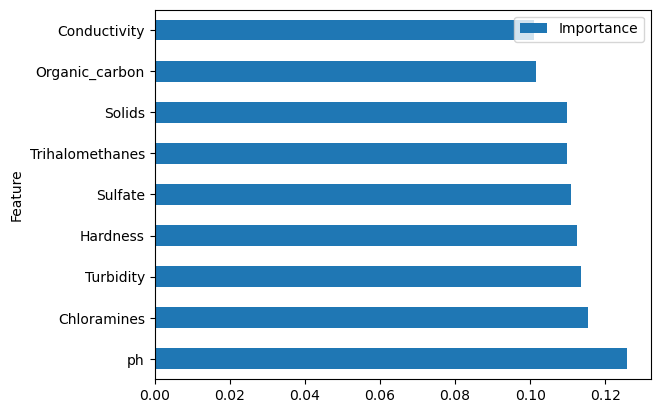

In [2]:
# Cargar los datos
data = pd.read_csv("water_potability.csv")  

X = data.drop("Potability", axis=1)
y = data["Potability"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1323)


def get_best_model(experiment_id):
    """Devuelve el mejor modelo entrenado basado en el f1-score registrado en MLFlow."""
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1", ascending=False)["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model(f"runs:/{best_model_id}/model")
    return best_model


def optimize_model():
    # Crear el experimento en MLFlow
    experiment_name = "XGBoost_Optimization_Experiment"
    mlflow.set_experiment(experiment_name)

    # Carpeta para guardar los gráficos y modelos
    plots_dir = "plots"
    models_dir = "models"
    os.makedirs(plots_dir, exist_ok=True)
    os.makedirs(models_dir, exist_ok=True)

    # Función objetivo para Optuna
    def objective(trial):
        # Hiperparámetros a optimizar
        params = {
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "n_estimators": trial.suggest_int("n_estimators", 50, 200),
            "min_child_weight": trial.suggest_float("min_child_weight", 0.1, 10, log=True),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        }

        # Entrenar modelo con los parámetros actuales
        model = XGBClassifier(**params, eval_metric="logloss")

        with mlflow.start_run(run_name=f"XGBoost_lr_{params['learning_rate']}"):
            mlflow.log_params(params)

            model.fit(X_train, y_train)
            predictions = model.predict(X_valid)

            # Calcular f1-score
            f1 = f1_score(y_valid, predictions)
            mlflow.log_metric("valid_f1", f1)

            # Generar firma e input_example
            input_example = X_train.iloc[:5]
            signature = infer_signature(X_train, model.predict(X_train))

            # Guardar el modelo como artefacto
            mlflow.sklearn.log_model(
                model,
                artifact_path="model",
                signature=signature,
                input_example=input_example,
            )

        return f1

    # Crear el estudio de Optuna
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)

    # Guardar gráficos en MLFlow (usar HTML para mayor eficiencia)
    optimization_history_fig = optuna.visualization.plot_optimization_history(study)
    optimization_history_fig.write_html(f"{plots_dir}/optimization_history.html")
    param_importances_fig = optuna.visualization.plot_param_importances(study)
    param_importances_fig.write_html(f"{plots_dir}/param_importances.html")

    # Registrar gráficos como artefactos en MLFlow
    mlflow.log_artifact(f"{plots_dir}/optimization_history.html")
    mlflow.log_artifact(f"{plots_dir}/param_importances.html")

    # Entrenar y guardar el mejor modelo
    best_params = study.best_params
    best_model = XGBClassifier(**best_params, eval_metric="logloss")
    best_model.fit(X_train, y_train)

    # Serializar y guardar el mejor modelo
    with open(f"{models_dir}/best_model.pkl", "wb") as f:
        pickle.dump(best_model, f)
    mlflow.log_artifact(f"{models_dir}/best_model.pkl")

    # Guardar la importancia de las variables
    importances = pd.DataFrame(
        {
            "Feature": X.columns,
            "Importance": best_model.feature_importances_,
        }
    ).sort_values(by="Importance", ascending=False)

    importances_plot = importances.plot.barh(x="Feature", y="Importance")
    importances_plot.figure.savefig(f"{plots_dir}/feature_importances.png")
    mlflow.log_artifact(f"{plots_dir}/feature_importances.png")

    # Guardar versiones de librerías
    with open(f"{models_dir}/libraries_version.txt", "w") as f:
        f.write(f"Optuna: {optuna.__version__}\n")
        f.write(f"MLFlow: {mlflow.__version__}\n")
        f.write(f"XGBoost: {XGBClassifier.__module__.split('.')[0]}\n")
    mlflow.log_artifact(f"{models_dir}/libraries_version.txt")

    print("Optimización completada. Mejor modelo guardado.")


if __name__ == "__main__":
    optimize_model()
    # Recuperar el mejor modelo
    experiment = mlflow.get_experiment_by_name("XGBoost_Optimization_Experiment")
    best_model = get_best_model(experiment.experiment_id)
    print("Mejor modelo recuperado.")

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.

## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<div align="center">
  <img src="https://i.pinimg.com/originals/84/5d/f1/845df1aefc6a5e37ae575327a0cc6e43.gif" width="500">
</div>